#Question 1

Pre-Processing

In [ ]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lab_Data/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
#separating features and labels
X = df.drop('class',axis=1)
y = df['class']
print('Features:')
print(X)
print('Labels:')
print(y)

Features:
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Labels:
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length:

In [ ]:
#normalizing features
def normalize(X):
  for column in X.columns:
    X[column] = X[column]/X[column].max()
  return X

X = normalize(X)
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0        0.645570     0.795455      0.202899         0.08
1        0.620253     0.681818      0.202899         0.08
2        0.594937     0.727273      0.188406         0.08
3        0.582278     0.704545      0.217391         0.08
4        0.632911     0.818182      0.202899         0.08
..            ...          ...           ...          ...
145      0.848101     0.681818      0.753623         0.92
146      0.797468     0.568182      0.724638         0.76
147      0.822785     0.681818      0.753623         0.80
148      0.784810     0.772727      0.782609         0.92
149      0.746835     0.681818      0.739130         0.72

[150 rows x 4 columns]


In [ ]:
#encoding categorical label data
def encode(y):
  y = y.replace(to_replace='Iris-setosa',value=0)
  y = y.replace(to_replace='Iris-versicolor',value=1)
  y = y.replace(to_replace='Iris-virginica',value=2)
  return y

y = encode(y)
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


In [ ]:
#splitting in the training and testing data set into the ratio 70:30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
print("Train:Test =",len(X_train),":",len(X_test),"= 70 : 30")

Train:Test = 105 : 45 = 70 : 30


#Part 1 & 2

Gaussian Bayes Classifier from Scratch

In [ ]:
from sklearn.datasets import make_classification

class GaussianBayesClassifier:
    def __init__(self, case=1):
        self.case = case
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        
        if self.case == 1:
            self.priors = []
            self.means = []
            self.vars = []
            for class_ in self.classes:
                X_class = X[y == class_]
                prior = len(X_class) / len(X)
                mean = np.mean(X_class, axis=0)
                var = np.var(X_class, axis=0)
                self.priors.append(prior)
                self.means.append(mean)
                self.vars.append(var)
                
        elif self.case == 2:
            self.priors = []
            self.means = []
            self.vars = []
            for class_ in self.classes:
                X_class = X[y == class_]
                prior = len(X_class) / len(X)
                mean = np.mean(X_class, axis=0)
                var = np.var(X_class, axis=0)
                self.priors.append(prior)
                self.means.append(mean)
                self.vars.append(var)
            
                
        elif self.case == 3:
            self.priors = []
            self.means = []
            self.vars = []
            for class_ in self.classes:
                X_class = X[y == class_]
                prior = len(X_class) / len(X)
                mean = np.mean(X_class, axis=0)
                var = np.var(X_class, axis=0)
                self.priors.append(prior)
                self.means.append(mean)
                self.vars.append(var)
                
    def _gaussian_pdf(self, x, mean, std):
        exponent = np.exp(-((x - mean)**2) / (2 * std**2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    
    def _class_probabilities(self, X):
        probs = []
        for i, class_ in enumerate(self.classes):
            if self.case == 1:
                mean = self.means[i]
                var = self.vars[0]
                prob = np.prod(self._gaussian_pdf(X, mean, np.sqrt(var[0])), axis=1)*self.priors[i]
                
            elif self.case == 2:
                mean = self.means[i]
                var = self.vars[0]
                prob = np.prod(self._gaussian_pdf(X, mean, np.sqrt(var[1])), axis=1)*self.priors[i]
                
            elif self.case == 3:
                prior = self.priors[i]
                mean = self.means[i]
                var = self.vars[i]
                prob = prior * np.prod(self._gaussian_pdf(X, mean, np.sqrt(var)), axis=1)
                
            probs.append(prob)
        return probs
    
    def predict(self, X):
        probs = self._class_probabilities(X)
        return [self.classes[np.argmax(prob)] for prob in np.array(probs).T]
    
    def predict_proba(self, X):
        probs = self._class_probabilities(X)
        return np.array(probs).T
    
    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

    def plot_db(self,X,y,cmap = 'Paired_r'):
      
      # h = 0.01
      # x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
      # y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h

      # xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
      # xx = xx.reshape(-1,1)
      # yy = yy.reshape(-1,1)
      # z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      # z = z.reshape(xx.shape)

      # plt.figure(figsize = (5,5))
      # plt.contourf(xx,yy,z,cmap=cmap,alpha = 0.5)
      # plt.contour(xx,yy,z,colors = 'k',linewidths = 0.5)
      plt.scatter(X[:,0],X[:,1],c = y , cmap = cmap , edgecolors = 'k')

#Part 3

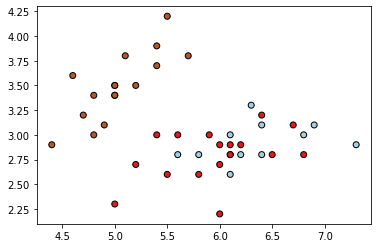

In [ ]:
plt.scatter(X_test.to_numpy()[:,0],X_test.to_numpy()[:,1],c = y_test , cmap = 'Paired_r' , edgecolors = 'k')

For case 1

[2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0]
0.9111111111111111


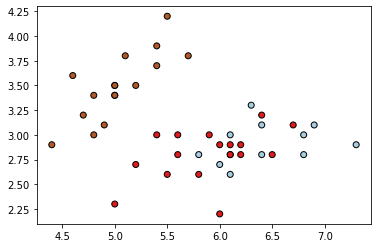

In [ ]:
gb = GaussianBayesClassifier(case=1)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(y_pred)
print(gb.score(X_test, y_test))
gb.plot_db(X_test.to_numpy(),y_pred)

For case 2

[2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0]
0.9111111111111111


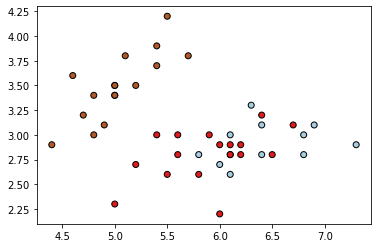

In [ ]:
gb = GaussianBayesClassifier(case=2)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(y_pred)
print(gb.score(X_test, y_test))
gb.plot_db(X_test.to_numpy(),y_pred)

For case 3

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0]
1.0


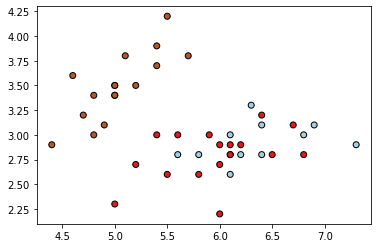

In [ ]:
gb = GaussianBayesClassifier(case=3)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(y_pred)
print(gb.score(X_test, y_test))
gb.plot_db(X_test.to_numpy(),y_pred)

#Part 4

In [ ]:
def cross_validation(X,y,case_n,folds=5):
  for i in range(0,folds):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/folds)
    gb = GaussianBayesClassifier(case=case_n)
    gb.fit(X_train, y_train) 
    print(gb.score(X_test, y_test))

In [ ]:
cross_validation(X,y,1)

1.0
0.9333333333333333
0.9666666666666667
0.9333333333333333
1.0


In [ ]:
cross_validation(X,y,2)

0.9666666666666667
0.9666666666666667
1.0
0.9333333333333333
0.9666666666666667


In [ ]:
cross_validation(X,y,3)

1.0
0.9333333333333333
0.9666666666666667
1.0
1.0


#Part 5

In [ ]:
import random
from numpy.random import randint
X1 = []
X2 = []
y_ = []
X1_temp = [random.uniform(0,5) for _ in range(500)]
X2_temp = [random.uniform(0,5) for _ in range(500)]
for i in range(0,len(X1_temp)):
  if X1_temp[i]**2 + X2_temp[i]**2 > 9 and X1_temp[i]**2 + X2_temp[i]**2 <= 25:
    y_.append(2)
    X1.append(X1_temp[i])
    X2.append(X2_temp[i])
  if X1_temp[i]**2 + X2_temp[i]**2 <= 9:
    y_.append(1)
    X1.append(X1_temp[i])
    X2.append(X2_temp[i])

my_array = []
for i in range(200):
  my_array.append([X1[i],X2[i],y_[i]])

df1 = pd.DataFrame(my_array, columns = ['X1','X2','Y'])
df1


,X1,X2,Y
0,2.400373,2.340363,2
1,1.767488,2.119171,1
2,3.407196,2.047977,2
3,4.194455,0.940093,2
4,4.052629,2.416404,2
...,...,...,...
195,1.554388,4.213402,2
196,1.802284,4.007889,2
197,4.455971,1.796221,2
198,1.427376,4.289314,2


In [ ]:
X_cir = df1.drop('Y',axis=1)
y_cir = df1['Y']
X_train,X_test,y_train,y_test = train_test_split(X_cir,y_cir,test_size = 0.3)

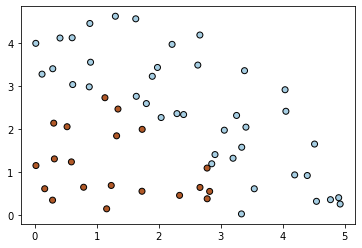

In [ ]:
plt.scatter(X_test.to_numpy()[:,0],X_test.to_numpy()[:,1],c = y_test , cmap = 'Paired_r' , edgecolors = 'k')

0.9


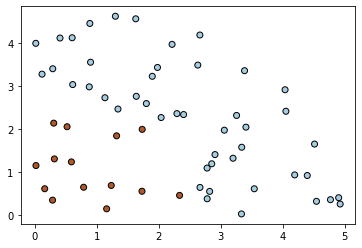

In [ ]:
gb = GaussianBayesClassifier(case=3)
gb.fit(X_train, y_train) 
y_pred = gb.predict(X_test)
print(gb.score(X_test, y_test))
gb.plot_db(X_test.to_numpy(),y_pred)

#Question 2

#Part 1

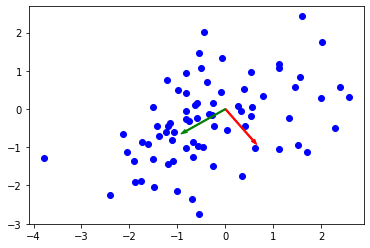

[[1.56134944 0.60381577]
 [0.60381577 1.12455011]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def covar(X):
  #N = number of rows , M = number of columns
  N, M = X.shape
  cov = np.zeros((M, M))
  for i in range(M):
    #mean
    mean_i = np.sum(X[:, i]) / N
    for j in range(M):
        mean_j = np.sum(X[:, j]) / N
        #covariance
        cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
  return cov

#mean vector
mu = np.array([0, 0])
#covariance matrix
sigma = np.array([[3/2, 1/2], [1/2, 3/2]])
#datapoints
X = np.random.multivariate_normal(mu, sigma, size=75)

S = covar(X)

#eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(S)

#plot
plt.scatter(X[:,0], X[:,1], color='b')
plt.arrow(mu[0], mu[1], eigenvectors[0,0], eigenvectors[0,1], color='r', width=0.03)
plt.arrow(mu[0], mu[1], eigenvectors[1,0], eigenvectors[1,1], color='g', width=0.03)
plt.show()
print(S)


#Part 2

In [ ]:
from scipy.linalg import sqrtm
sqrt_s = sqrtm(np.linalg.inv(S))
Y = np.dot(X, sqrt_s)
S_Y = covar(Y)

print(S_Y)

[[1.00000000e+00 9.90198914e-17]
 [9.90198914e-17 1.00000000e+00]]


#Part 3

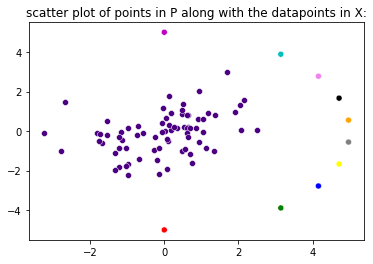

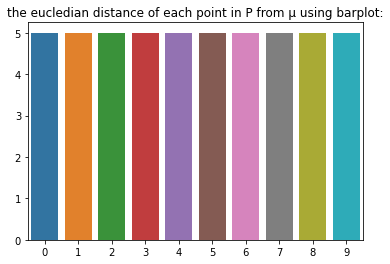

In [ ]:
import seaborn as sns
P = np.array([[np.sqrt(25 - y**2), y] for y in np.linspace(-5, 5, 10)])
categories = np.array([0, 1, 2, 3, 4, 5, 6,7,8,9])
colormap = np.array(['r', 'g', 'b','yellow','grey','orange','black','violet','c','m'])
plt.title("scatter plot of points in P along with the datapoints in X:")
sns.scatterplot(X[:, 0], X[:, 1], color='indigo')
sns.scatterplot(P[:, 0], P[:, 1], c=colormap[categories])
plt.show()
print("")
distance = np.linalg.norm(P - mu, axis=1)
plt.title("the eucledian distance of each point in P from µ using barplot:")
sns.barplot(np.arange(10), distance)
plt.show()

#Part 4

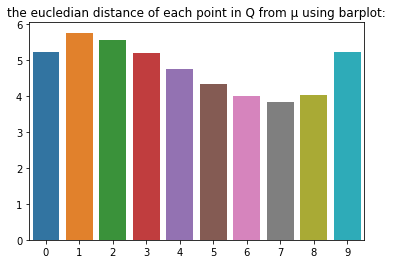

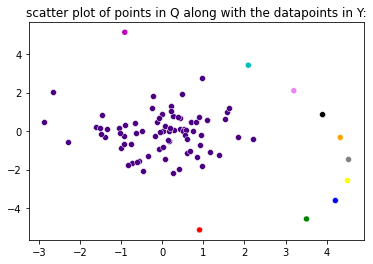

In [ ]:
from scipy.linalg import sqrtm
sqrt_p = sqrtm(np.linalg.inv(S))
Q = np.dot(P, sqrt_p)
distance_Q = np.linalg.norm(Q - mu, axis=1)
plt.title("the eucledian distance of each point in Q from µ using barplot:")
sns.barplot(np.arange(10), distance_Q)
plt.show()
plt.title("scatter plot of points in Q along with the datapoints in Y:")
sns.scatterplot(Y[:, 0], Y[:, 1], color='indigo')
sns.scatterplot(Q[:, 0], Q[:, 1], c=colormap[categories])
plt.show()